Vortices!

11125
(89, 125)


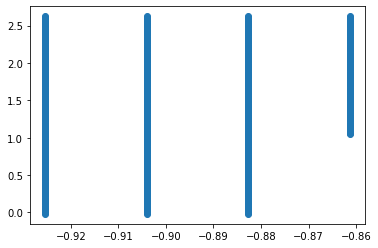

[[-0.925333 -0.925333 -0.925333 ... -0.925333 -0.925333 -0.925333]
 [-0.904    -0.904    -0.904    ... -0.904    -0.904    -0.904   ]
 [-0.882667 -0.882667 -0.882667 ... -0.882667 -0.882667 -0.882667]
 ...
 [ 0.909333  0.909333  0.909333 ...  0.909333  0.909333  0.909333]
 [ 0.930667  0.930667  0.930667 ...  0.930667  0.930667  0.930667]
 [ 0.952     0.952     0.952    ...  0.952     0.952     0.952   ]]


In [1]:
#1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

#2
f = np.genfromtxt("Velocity0241.dat", dtype=float, delimiter=",", skip_header=1)

print (len(f))

X = f[:,0]
Y = f[:,1]
U = f[:,2]
V = f[:,3]

#K = np.reshape(X, (89, 125))



#3
x = np.reshape(f[:,0], (89,125))
y = np.reshape(f[:,1], (89,125))
u = np.reshape(f[:,2], (89,125))
v = np.reshape(f[:,3], (89,125))

print (np.shape(u))

plt.scatter(X[0:450],Y[0:450])
plt.show()
print(x)
#plt.plot(y[0,:])

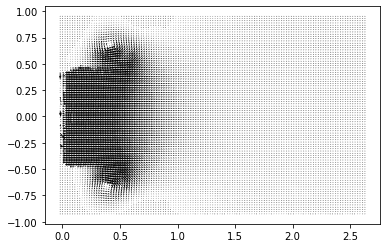

In [2]:
#4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


plt.quiver(Y,X, V, U)

plt.show()

ValueError: 'x' values must be equally spaced

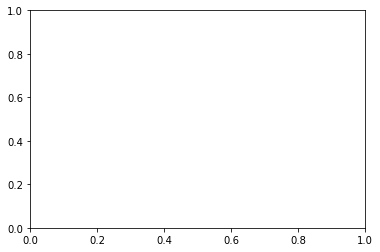

In [3]:
#4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


plt.streamplot(y, x, v, u)
plt.show()

In [4]:
# gradient function
def derivx(M,X):
    Mc = M.copy() 
    for i in range(89):  #we could use len(M), but this might actually help students understand what is going on
        for j in range(125):
            if i == 0:    # Forward Difference
                Mc[i,j] = (M[i+1,j] - M[i,j]) / (X[i+1,j] - X[i,j])
            elif (i == 88):    # Backward Difference
                    Mc[i,j] = (M[i,j] - M[i-1,j]) / (X[i,j] - X[i-1,j])
            else:    # Central Difference
                Mc[i,j] = (M[i+1,j] - M[i-1,j]) / (X[i+1,j] - X[i-1,j])           
    return Mc

# gradient function
def derivy(M,Y):
    Mc = M.copy() 
    for i in range(89):
        for j in range(125):
            if j == 0:    # Forward Difference
                Mc[i,j] = (M[i,j+1] - M[i,j]) / (Y[i,j+1] - Y[i,j])
            elif (j == 124):    # Backward Difference
                Mc[i,j] = (M[i,j] - M[i,j-1]) /  (Y[i,j] - Y[i,j-1]) 
            else:    # Central Difference
                Mc[i,j] = (M[i,j+1] - M[i,j-1]) / (Y[i,j+1] - Y[i,j-1])            
    return Mc            

dUdx = derivx(u,x) 
dVdy = derivy(v,y)
dVdx = derivx(v,x)    # space along Y    
dUdy = derivy(u,y)    # space along X

Div = np.array(dUdx) + np.array(dVdy)

Curl = np.array(dVdx) - np.array(dUdy)



(89, 125)


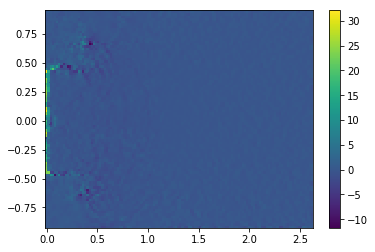

In [5]:
#6
'''
For divergence we are going to use Ux and Vy that are calculated in #5
'''
import numpy as np
import matplotlib.pyplot as plt




print (np.shape(Div))

P = plt.pcolormesh(y, x, Div)

plt.colorbar(P)

plt.show()

(89, 125)


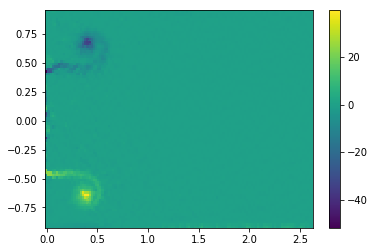

In [6]:
#7
'''
For curl we are going to use Vx and Uy that are calculated in #5
'''
import numpy as np
import matplotlib.pyplot as plt



print (np.shape(Curl))

P = plt.pcolormesh(y, x, Curl)

plt.colorbar(P)

plt.show()